# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    Normalizer,
    RobustScaler
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet
)
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
    NearestNeighbors
)
from sklearn.svm import (
    SVC,
    SVR
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    RandomForestRegressor,
    BaggingRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor
)
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)

logging.basicConfig(level=logging.INFO)

# Call_def

In [2]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    check_balance_Classification,
    over_under_sampling_classification,
    check_Balance_Regression,
    over_under_sampling_regression,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    grid_search_classifier,
    grid_search_regressor,
    random_search_classifier,
    random_search_regressor,
    get_classifier,
    plot_feature_importance_Classification,
    get_regressor,
    plot_feature_importance_Regression,
    get_x_y,
    Check_Overfitting_Classification,
    Check_Overfitting_Regression,
    plot_confusion_matrix,
    evaluate_model_Classification,
    evaluate_model_regression,
)

# Read_Data

In [3]:
df = read_data(r'Telco_customer_churn.xlsx', sheet_name='Telco_Churn')
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Telco_customer_churn.xlsx


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Get Information of Data

In [4]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [5]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043,7043,0
1,Count,int64,[1],1,7043,0
2,Country,object,[United States],1,7043,0
3,State,object,[California],1,7043,0
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129,7043,0
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",1652,7043,0
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652,7043,0
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652,7043,0
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651,7043,0
9,Gender,object,"[Male, Female]",2,7043,0


# drop not useful columns

#### list of columns

In [6]:
not_useful_columns_name = ['CustomerID', 'Count', 'Country', 'State', 'Churn Label', 'Churn Reason']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [7]:
not_useful_columns(df=df, column_name="Lat Long")

# change the dtype of the column from object to numeric

#### list of columns

In [8]:
convert_to_numeric_columns_name = ['Total Charges']
convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [9]:
# convert_to_numeric(df=df, column_name='Total Charges')

# Describe numerical column and his information

In [10]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [11]:
df.describe()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


# Describe object column and his information

In [12]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [13]:
df.describe(include=['object'])

,City,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,1129,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Los Angeles,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,305,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


# Data Encoding columns with 2 unique values

In [14]:
object_columns = df.select_dtypes(include=['object']).columns
columns_with_2_unique_values = [col for col in object_columns if len(df[col].value_counts()) == 2]

df = encode_column(df, columns = columns_with_2_unique_values, method='binary')

In [15]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Los Angeles,90003,33.964131,-118.272783,1,1,1,1,2,1,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,86,3239
1,Los Angeles,90005,34.059281,-118.307420,0,1,1,0,2,1,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,67,2701
2,Los Angeles,90006,34.048013,-118.293953,0,1,1,0,8,1,...,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1,86,5372
3,Los Angeles,90010,34.062125,-118.315709,0,1,0,0,28,1,...,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1,84,5003
4,Los Angeles,90015,34.039224,-118.266293,1,1,1,0,49,1,...,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,89,5340


# check columns have nulls

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [17]:
df.isnull().sum()

City                  0
Zip Code              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64

## Identify columns with missing values

In [18]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 ['Total Charges']


# Removing Rows with Missing Values

#### list of columns

In [19]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [20]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [21]:
# remove_missing_rows(df=df)

## check columns with missing values

In [22]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 ['Total Charges']


# Filling Missing Values

### Filling Missing Values for all DataFrame

In [23]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [24]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [25]:
df = fill_missing_values_column(df, columns='Total Charges', model='KNNImputer', n_neighbors=3)

Columns with missing values: ['Total Charges']
Starting imputation for columns ['Total Charges'] using KNNImputer model
Imputation completed for columns ['Total Charges'] using KNNImputer model


### check columns with missing values

In [26]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [27]:
outliers_df = check_outliers(df)

Zip Code             7043
Latitude                0
Longitude            7043
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Paperless Billing       0
Monthly Charges         0
Total Charges        5941
Churn Value             0
Churn Score             0
CLTV                 7043
dtype: int64


## check outliers (plots)

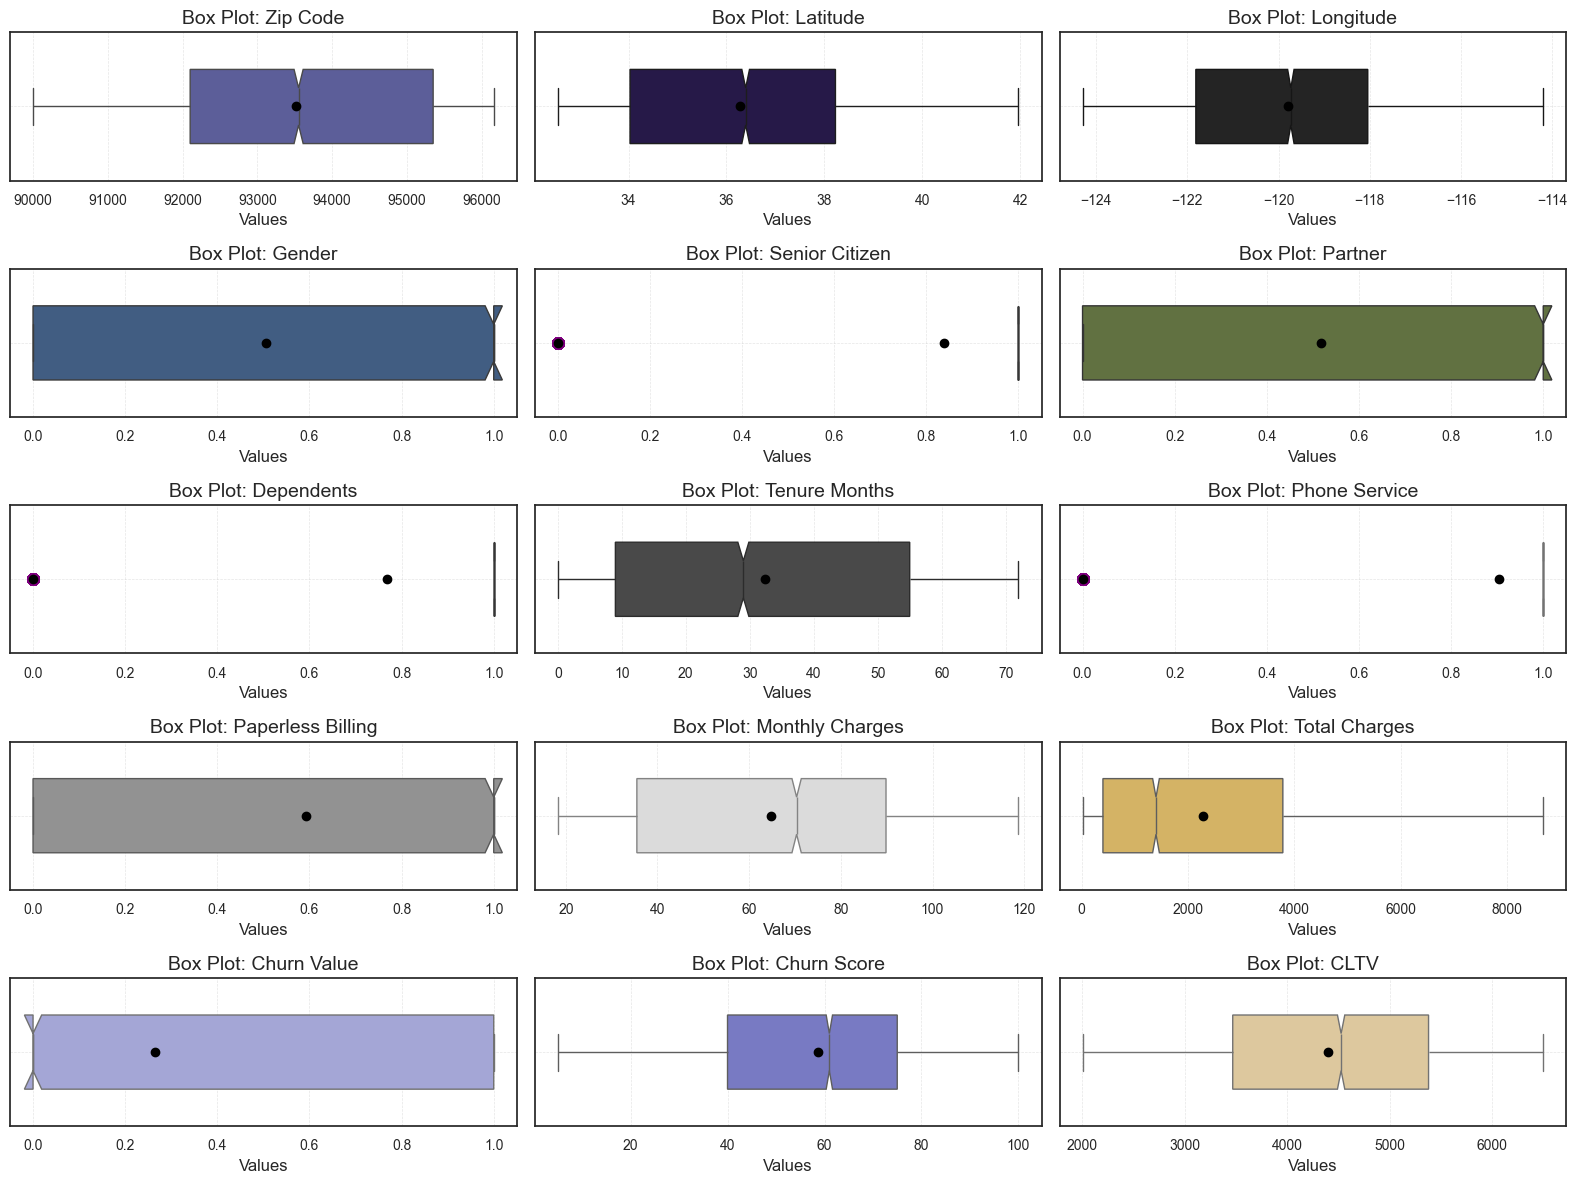

In [28]:
box_plot_all_columns(df, subplot_row = 3)

# Check balance for Output (Classification_train)

INFO:root:Computing value counts for column: Loan_Status
INFO:root:Creating count plot for column: Loan_Status
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


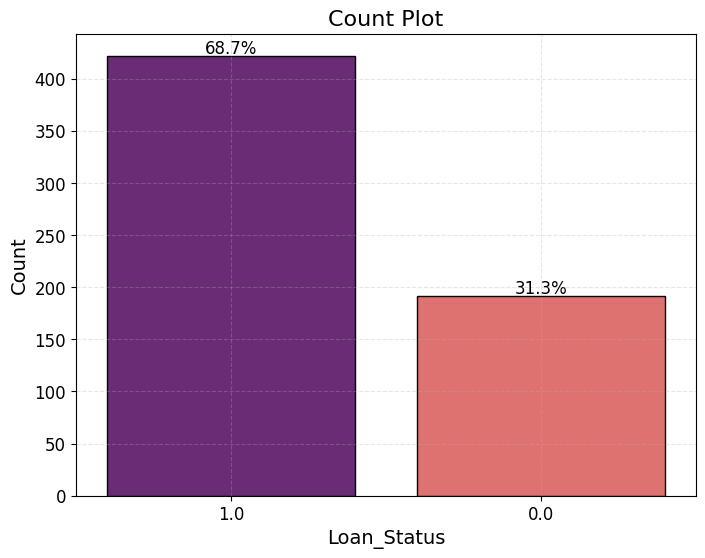

,count
name,
1.0,422
0.0,192


In [117]:
check_balance_Classification(df)

# How to balance Classification_data.

In [118]:
x,y=get_x_y(df,target='Loan_Status')

In [119]:
df, x, y = over_under_sampling_classification(x,y,over_sampling_strategy=0.75,make_df=True)

INFO:root:Starting over-sampling and/or under-sampling process.
INFO:root:Initial class distribution: Counter({1.0: 422, 0.0: 192})
INFO:root:Applying SMOTE with strategy 0.75
INFO:root:Applying TomekLinks under-sampling.
INFO:root:Final class distribution: Counter({1.0: 353, 0.0: 316})
INFO:root:Over-sampling and/or under-sampling process completed.


### Check balance for Output (Classification_train)

INFO:root:Computing value counts for column: Loan_Status
INFO:root:Creating count plot for column: Loan_Status
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


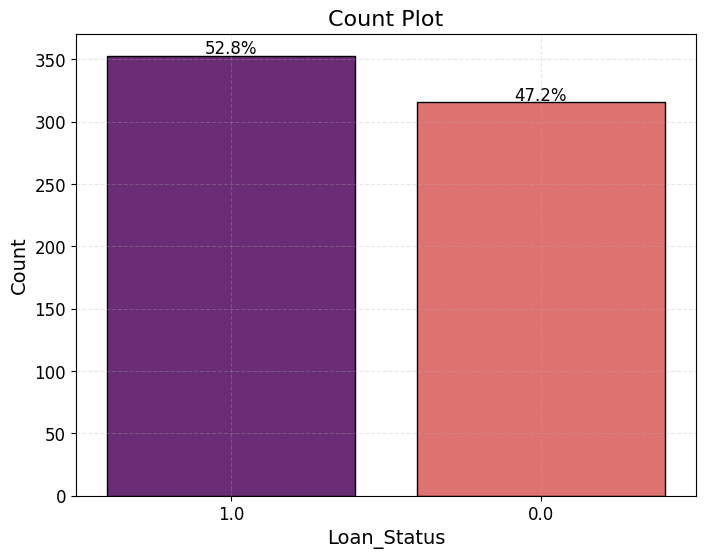

,count
name,
1.0,353
0.0,316


In [120]:
check_balance_Classification(df, y_out='Loan_Status')

# Check balance for Output (Regression_train)

In [121]:
# check_Balance_Regression(df, y_out='Profit', div_number=4)

# How to balance regression_data. 

In [122]:
# x,y=get_x_y(df)

In [123]:
# df, x, y = over_under_sampling_regression(x,y,over_sampling_strategy=0.8)

### Check balance for Output (Regression_train)

In [124]:
# check_Balance_Regression(df, y_out='Profit', div_number=4)

# Groupby and pivot

## Groupby

In [125]:
# groupby_columns = ['BMI', 'Glucose', 'Outcome'] 
# df_group_one = plot_groupby(df, groupby_columns, plot=True)
# print(df_group_one)

## pivot

In [126]:
# plot_pivot(df_group_one, 'BMI', 'Glucose')

In [127]:
# pivoted_df = plot_pivot(df_group_one, 'BMI', 'Glucose')

## Groupby, pivot

In [128]:
# results = plot_groupby_and_pivot(df, ['BMI', 'Glucose', 'Outcome'] , 'BMI', 'Glucose', plot_group=True, plot_pivot=True)
# grouped_df = results['grouped']
# pivoted_df = results['pivoted']

# Correlation Coefficient

## Calculate Correlation

In [32]:
calculate_correlation(df, outcome_column='Churn Value',num_results=5)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 5 results:
           Variable  Pearson Coefficient        P-Value
12      Churn Score             0.664897   0.000000e+00
7     Tenure Months            -0.352229  7.999058e-205
6        Dependents             0.248542   1.234365e-99
11    Total Charges            -0.199428   4.233836e-64
10  Monthly Charges             0.193356   2.706646e-60
Churn Score
The Pearson Correlation Coefficient for Churn Score is 0.6649 with a P-value of P = 0

Tenure Months
The Pearson Correlation Coefficient for Tenure Months is -0.3522 with a P-value of P = 7.999e-205

Dependents
The Pearson Correlation Coefficient for Dependents is 0.2485 with a P-value of P = 1.234e-99

Total Charges
The Pearson Correlation Coefficient for Total Charges is -0.1994 with a P-value of P = 4.234e-64

Monthly Charges
The Pearson Correlation Coefficient for Monthly Charges is 0.1934 with a P-value of P = 2.707e

,Variable,Pearson Coefficient,P-Value
12,Churn Score,0.664897,0.000000e+00
7,Tenure Months,-0.352229,7.999058e-205
6,Dependents,0.248542,1.234365e-99
11,Total Charges,-0.199428,4.233836e-64
10,Monthly Charges,0.193356,2.706646e-60


# Visualize Correlation with Heatmap

INFO:root:Computing correlation matrix for numeric columns.
INFO:root:Generating heatmap for correlation matrix.
INFO:root:Heatmap saved to heatmap.png


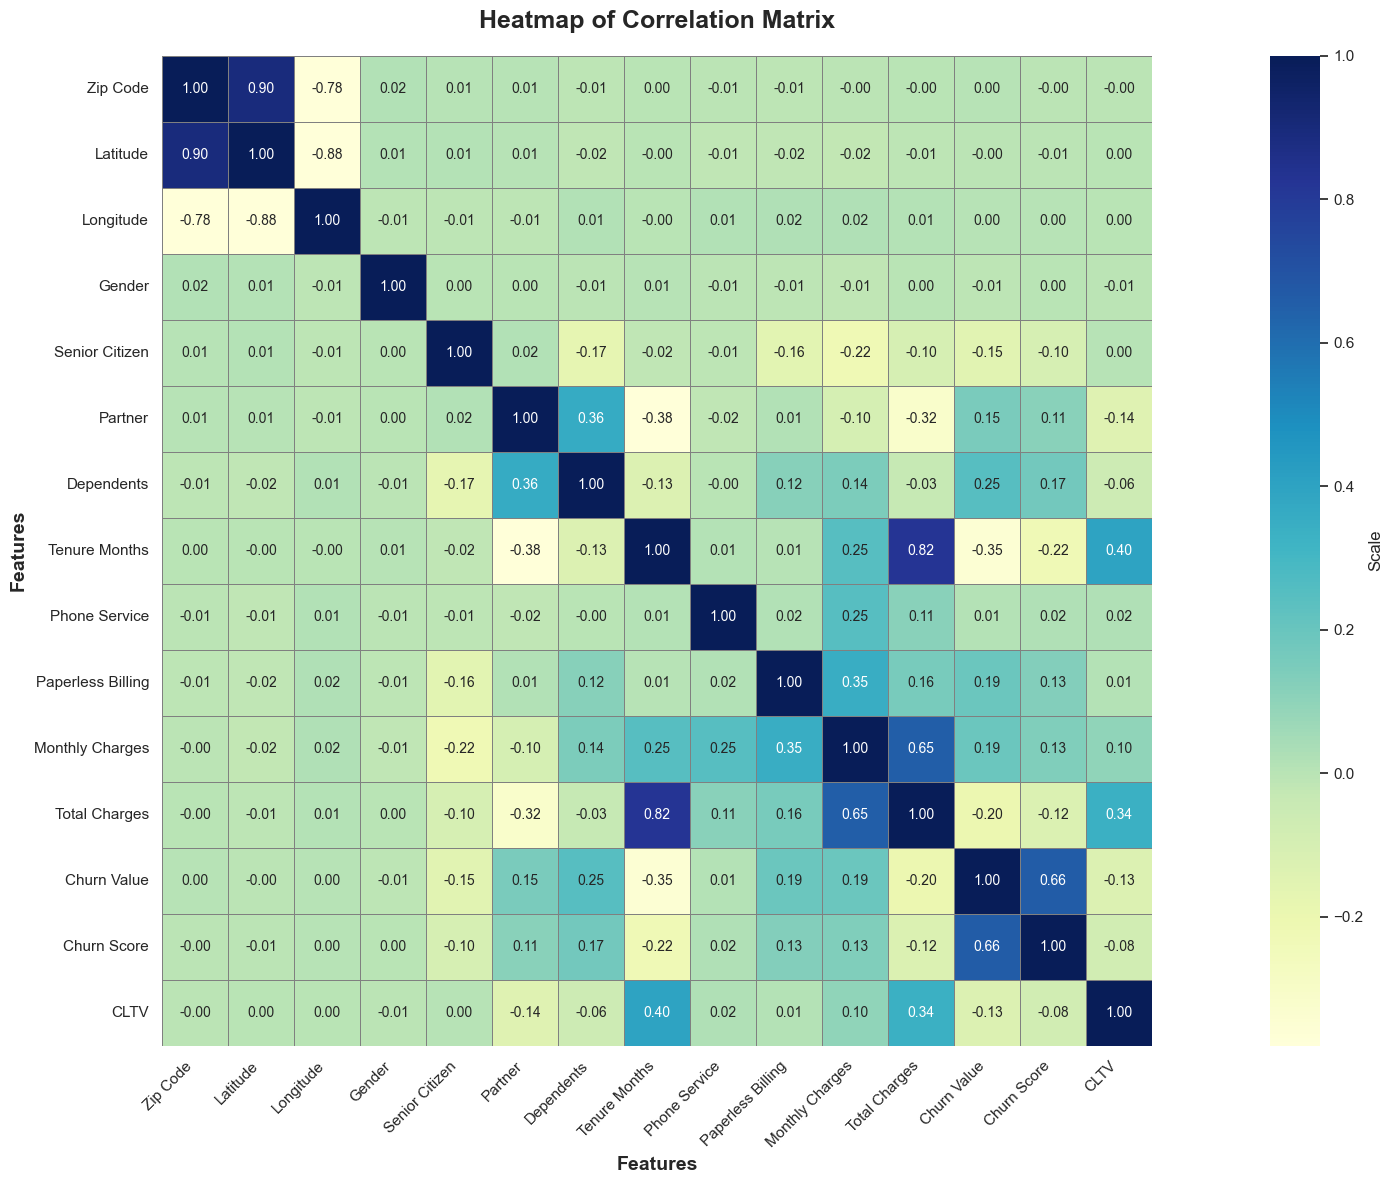

INFO:root:Heatmap generation complete.


In [33]:
correlations = Heatmap_Correlation(df, mask=-1, save_path='heatmap.png')

## Scatter plot

In [131]:
# df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [132]:
# create_custom_scatter_plot(df, x_col='Credit_History', y_col='Loan_Status')

## Histogram

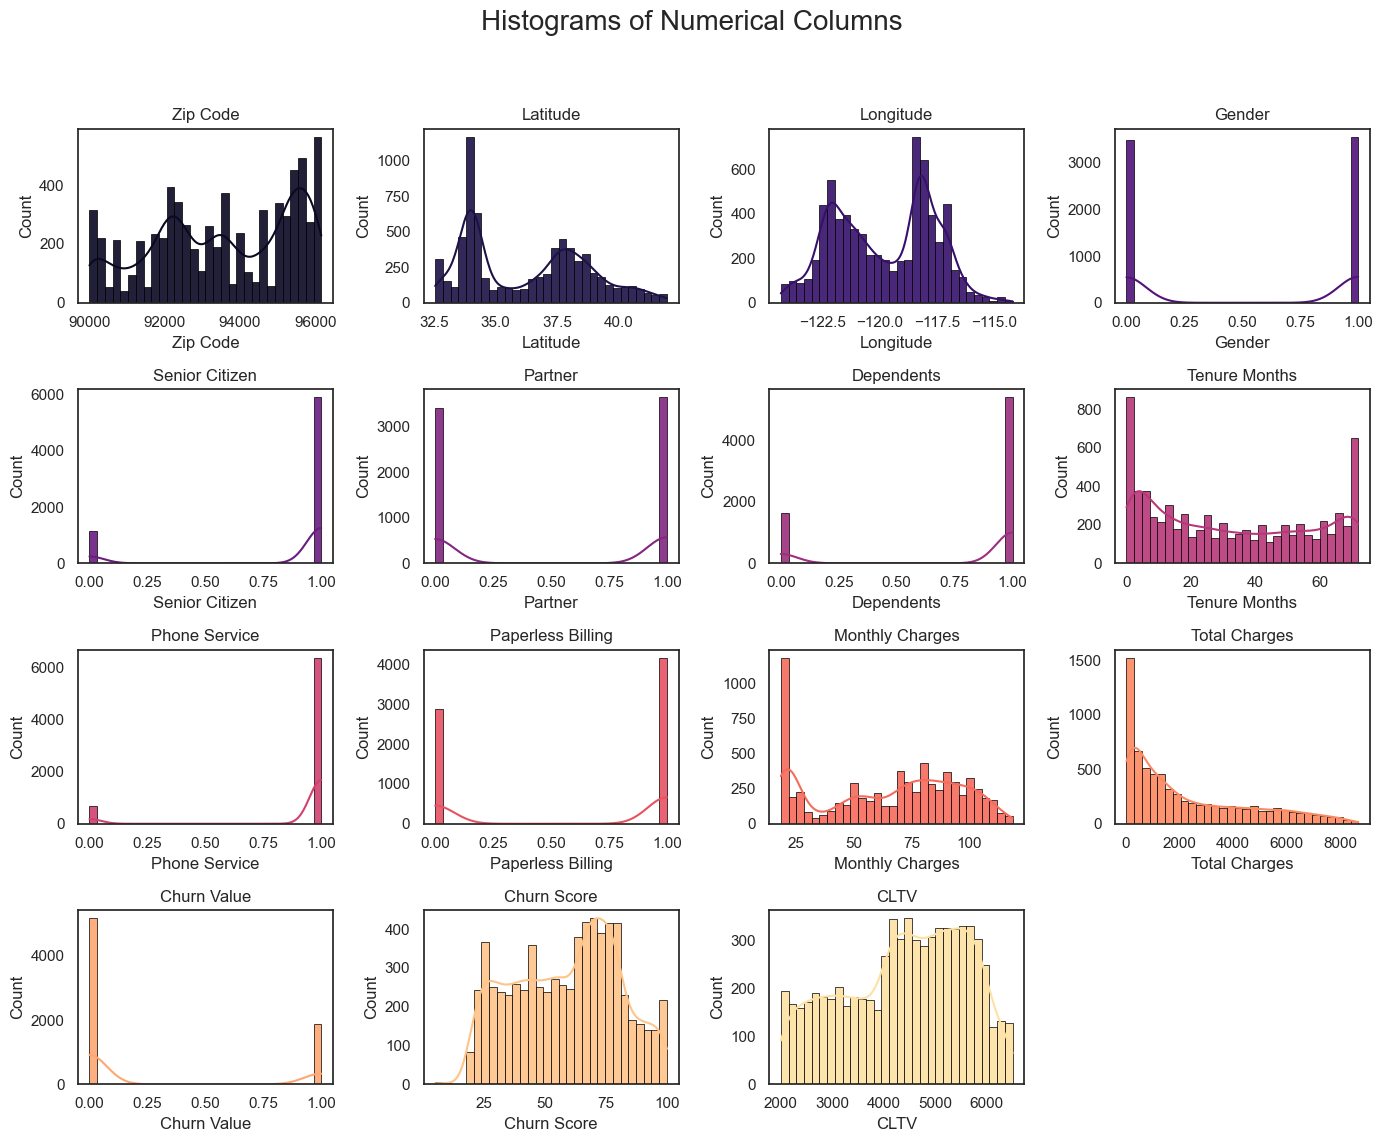

In [36]:
plot_histograms(df,column=None, bins=30)

# Data Encoding

In [ ]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [ ]:
column = ['Gender',
        'Senior Citizen',
        'Partner',
        'Dependents',
        'Phone Service',
        'Multiple Lines',
        'Internet Service',
        'Online Security',
        'Online Backup',
        'Device Protection',
        'Tech Support',
        'Streaming TV',
        'Streaming Movies',
        'Contract',
        'Paperless Billing',
        'Payment Method']

df = encode_column(df, columns = column, method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')
df = encode_column(df, columns = 'City', method='target',target="Churn Value")
# ordinal_categories = df['Dependents'].value_counts().index.to_list()
# df = encode_column(df, columns = '', method= 'ordinal', ordinal_categories=ordinal_categories)

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [ ]:
df.head()

# Make the target is last column

In [ ]:
df = target_last_col(df,'Churn Value')
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,No internet service,Yes,No internet service,Yes,One year,Two year,Credit card (automatic),Electronic check,Mailed check,Churn Value
0,0.295082,90003,33.964131,-118.272783,1,1,1,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.295082,90005,34.059281,-118.307420,0,1,1,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.295082,90006,34.048013,-118.293953,0,1,1,0,8,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,0.295082,90010,34.062125,-118.315709,0,1,0,0,28,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,0.295082,90015,34.039224,-118.266293,1,1,1,0,49,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


# Get X , Y (TVT)

In [134]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df)

In [135]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (470, 14)
x_valid shape = (65, 14)
x_test shape = (134, 14)
y_train shape = (470,)
y_valid shape = (65,)
y_test shape = (134,)


# Get train, valid and test data in same time

In [136]:
# df.columns.tolist()

In [137]:
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Loan_Status',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)

In [138]:
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [139]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [ ]:
x_train_new, x_test_new, x_valid_new, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, method='SelectKBest', stat_method='f_classif', k=25)

# Dimensionality Reduction

In [ ]:
x_train_new, x_test_new, x_valid_new, DR_model = dimensionality_reduction(x_train, x_test, method= 'PCA', n_components=23)

# Train

## Grid Search

### Grid Search Classification

In [172]:
ensemble_estimators = [('rf', RandomForestClassifier()), ('svm', SVC())]
best_params, best_score, best_estimator = grid_search_classifier('BaggingClassifier', x_train, y_train)

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
best_params = 0.928156862745098


In [173]:
model = best_estimator
model

BaggingClassifier(max_features=0.5, max_samples=0.5, n_estimators=50, n_jobs=-1)

### Grid Search Regression

In [ ]:
# ensemble_estimators = [('rf', RandomForestRegressor()), ('svr', SVR())]
# best_params, best_score, best_estimator = grid_search_regressor('RandomForestRegressor', x_train, y_train)

# print('best_params =',best_params)
# print('best_params =',best_score)

In [ ]:
# model = best_estimator
# model

## Random Search

### Random Search Classification

In [ ]:
# ensemble_estimators = [('rf', RandomForestClassifier()), ('svc', SVC())]
# best_params, best_score, best_estimator = random_search_classifier('DecisionTreeClassifier', x_train, y_train)

# print('best_params =',best_params)
# print('best_params =',best_score)

In [ ]:
# model = best_estimator
# model

### Random Search Regression

In [ ]:
# ensemble_estimators = [('rf', RandomForestRegressor()), ('svr', SVR())]
# best_params, best_score, best_estimator = random_search_regressor('RandomForestRegressor', x_train, y_train)

# print('best_params =',best_params)
# print('best_params =',best_score)

In [ ]:
# model = best_estimator
# model

## Train Without Search Classification

### Train Without Search Classification

In [ ]:
# model = get_classifier('random_forest_classifier', x_train, y_train, n_estimators=100, max_depth=5)
# model

In [ ]:
# # Example usage for each model

# # Logistic Regression
# logistic_regression_model = get_classifier(
#     'logistic_regression', x_train, y_train, solver='liblinear', max_iter=100
# )

# # Naive Bayes
# naive_bayes_model = get_classifier(
#     'naive_bayes', x_train, y_train
# )

# # K-Neighbors Classifier
# kneighbors_classifier_model = get_classifier(
#     'kneighbors_classifier', x_train, y_train, n_neighbors=5, algorithm='auto'
# )

# # Support Vector Classifier
# svc_model = get_classifier(
#     'svc', x_train, y_train, kernel='rbf', C=1.0
# )

# # Decision Tree Classifier
# decision_tree_classifier_model = get_classifier(
#     'decision_tree_classifier', x_train, y_train, criterion='gini', max_depth=None
# )

# # Random Forest Classifier
# random_forest_classifier_model = get_classifier(
#     'random_forest_classifier', x_train, y_train, n_estimators=100, max_depth=None
# )

# # Bagging Classifier
# bagging_classifier_model = get_classifier(
#     'bagging_classifier', x_train, y_train, n_estimators=10, base_estimator=None
# )

# # AdaBoost Classifier
# adaboost_classifier_model = get_classifier(
#     'adaboost_classifier', x_train, y_train, n_estimators=50, learning_rate=1.0
# )

# # Gradient Boosting Classifier
# gradient_boosting_classifier_model = get_classifier(
#     'gradient_boosting_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1
# )

# # XGBoost Classifier
# xgboost_classifier_model = get_classifier(
#     'xgboost_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1
# )

# # Stacking Classifier
# stacking_classifier_model = get_classifier(
#     'stacking_classifier', x_train, y_train, estimators=[
#         ('lr', LogisticRegression()),
#         ('rf', RandomForestClassifier(n_estimators=10))
#     ], final_estimator=LogisticRegression()
# )

### Train Without Search Regression

In [ ]:
# model = get_regressor('random_forest_regressor', x_train, y_train, n_estimators=100, max_depth=5, plot=True)
# model

In [ ]:
# # Linear Regression
# linear_regression_model = get_regressor('linear_regression', x_train, y_train)

# # Ridge Regression
# ridge_regression_model = get_regressor('ridge_regression', x_train, y_train, alpha=1.0)

# # Lasso Regression
# lasso_regression_model = get_regressor('lasso_regression', x_train, y_train, alpha=1.0)

# # K-Neighbors Regressor
# kneighbors_regressor_model = get_regressor('kneighbors_regressor', x_train, y_train, n_neighbors=5, algorithm='auto')

# # Support Vector Regressor
# svr_model = get_regressor('svr', x_train, y_train, kernel='rbf', C=1.0)

# # Decision Tree Regressor
# decision_tree_regressor_model = get_regressor('decision_tree_regressor', x_train, y_train, criterion='mse', max_depth=None)

# # Random Forest Regressor
# random_forest_regressor_model = get_regressor('random_forest_regressor', x_train, y_train, n_estimators=100, max_depth=None)

# # Bagging Regressor
# bagging_regressor_model = get_regressor('bagging_regressor', x_train, y_train, n_estimators=10, base_estimator=None)

# # AdaBoost Regressor
# adaboost_regressor_model = get_regressor('adaboost_regressor', x_train, y_train, n_estimators=50, learning_rate=1.0)

# # Gradient Boosting Regressor
# gradient_boosting_regressor_model = get_regressor('gradient_boosting_regressor', x_train, y_train, n_estimators=100, learning_rate=0.1)

# # XGBoost Regressor
# xgboost_regressor_model = get_regressor('xgboost_regressor', x_train, y_train, n_estimators=100, learning_rate=0.1)

# # Stacking Regressor
# stacking_regressor_model = get_regressor('stacking_regressor', x_train, y_train, estimators=[
#     ('lr', LinearRegression()),
#     ('rf', RandomForestRegressor(n_estimators=10))
# ], final_estimator=LinearRegression())


# Check Overfitting

## Check Overfitting Classification

In [161]:
df.columns.tolist()

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 '1',
 '2',
 '3+',
 'Semiurban',
 'Urban',
 'Loan_Status']

In [174]:
x,y = get_x_y(df,'Loan_Status')

Accuracy:
Training Accuracy: 0.9766
Validation Accuracy: 0.8462

Precision:
Training Precision: 0.9776
Validation Precision: 0.8507

Recall:
Training Recall: 0.9766
Validation Recall: 0.8462

F1-Score:
Training F1-Score: 0.9765
Validation F1-Score: 0.8451

MCC:
Training MCC: 0.9539
Validation MCC: 0.6953

Balanced Accuracy:
Training Balanced Accuracy: 0.9749
Validation Balanced Accuracy: 0.8430

Confusion Matrix:
Validation Confusion Matrix:
[[24  7]
 [ 3 31]]

Cross-Validation(CV):
Cross-Validation Scores: [0.79850746 0.82089552 0.7761194  0.8358209  0.81954887]
Cross-Validation Mean Score: 0.8102


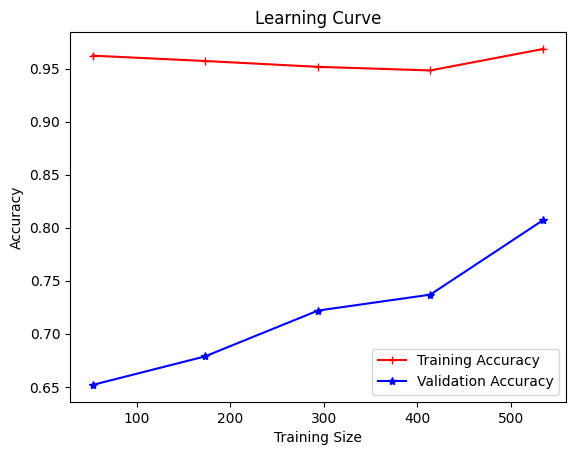

ROC AUC: 0.9070


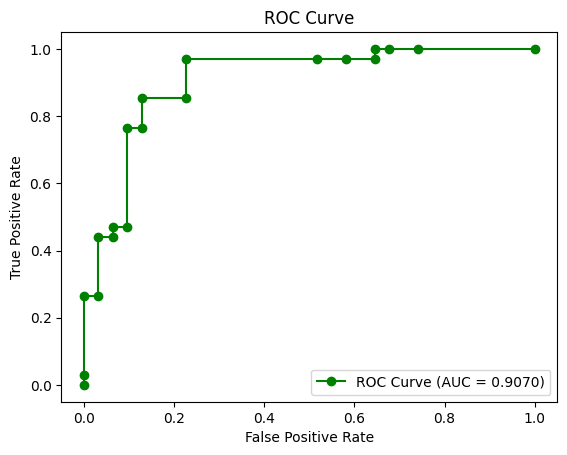

In [175]:
Check_Overfitting_Classification(model,x,y,x_train,y_train,x_valid,y_valid)

## Check Overfitting Regression

In [ ]:
# df.columns.tolist()

In [ ]:
# x,y = get_x_y(df,'Outcome')

In [ ]:
# Check_Overfitting_Regression(model,x,y,x_train,y_train,x_valid,y_valid)

# Solve_Overfitting

# Get y_predict

In [ ]:
y_pred = model.predict(x_test)

# Evaluate model

## Evaluate model Classification

### Confusion Matrix

In [ ]:
plot_confusion_matrix(y_test, y_pred)

### accuracy,recall,precision,f1 and roc_auc

In [ ]:
evaluate_model_Classification(y_test, y_pred)

## Evaluate model Regression

### MAE, MSE, RMSE and R2

In [ ]:
# evaluate_model_regression(y_test, y_pred)